In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

pages = []
conf_name = []
conf_date = []
for i in range(1, 6):
    url = 'http://www.allconferences.com/search/index/Category__parent_id:493247/Conference__start_date__from:02-04-2015/Conference__start_date__to:02-04-2020/showLastConference:1/page:' + str(i) + '/'
    pages.append(url)
    
for page in pages: 
    #collecting the first page of conferences and creating a beautiful soup object
    page = requests.get(page)
    soup = BeautifulSoup(page.text, 'html.parser')

    #Extracting the text form the webpage from the div element with class categories_conferences
    C_list = soup.find(id ='categories_conferences')

    #Removing the links and Superfluous Data from the text
    last_links_1 = soup.find(class_='order_option')
    last_links_1.decompose()
    last_links_2 = soup.find(class_='pager')
    last_links_2.decompose()
    last_links_3 = soup.find(id='categoryViewFormEmptList')
    last_links_3.decompose()

    #extracting text from all the instances of h2 tag within the div element
    list_items = C_list.find_all('h2')

    for x in list_items:
        names = x.a.text
        conf_name.append(names)
        print(names)

    list_items_date = C_list.find_all('span')
    
    for k in list_items_date:
        date = k.contents[1].strip()
        conf_date.append(date)
        print(date)

3rd International Conference on Networks, Communications, Wireless and Mobile Computing (NCWMC- 2018
4th International Conference of Managing Value and Supply Chains(MaVaS 2018)
2018 the 6th International Conference on Network and Computing Technologies (ICNCT 2018)
ICNCT 2017 the 5th International Conference on Network and Computing Technologies_EI
ICNIS 2016 3rd International Workshop on Networks and Information Security_IEEE,Ei Compendex
2019 The 8th International Conference on Network, Communication and Computing(ICNCC 2019)--Ei,SCOPUS
2019 The 4th International Conference on Network Security (ICNS 2019)--Ei,SCOPUS
2019 9th International Conference on Communication and Network Security (ICCNS 2019)--Ei,Scopus
IEEE--2019 The 7th Int. Conf. on Information, Communication and Network (ICICN 2019)--Ei,Scopus
2019 2nd International Conference on Communication and Network Protocol (ICCNP 2019)--JA,Scopus
2019 The 7th International Conference on Network and Computing Technologies (ICNCT 20

In [3]:
print(conf_name)


['3rd International Conference on Networks, Communications, Wireless and Mobile Computing (NCWMC- 2018', '4th International Conference of Managing Value and Supply Chains(MaVaS 2018)', '2018 the 6th International Conference on Network and Computing Technologies (ICNCT 2018)', 'ICNCT 2017 the 5th International Conference on Network and Computing Technologies_EI', 'ICNIS 2016 3rd International Workshop on Networks and Information Security_IEEE,Ei Compendex', '2019 The 8th International Conference on Network, Communication and Computing(ICNCC 2019)--Ei,SCOPUS', '2019 The 4th International Conference on Network Security (ICNS 2019)--Ei,SCOPUS', '2019 9th International Conference on Communication and Network Security (ICCNS 2019)--Ei,Scopus', 'IEEE--2019 The 7th Int. Conf. on Information, Communication and Network (ICICN 2019)--Ei,Scopus', '2019 2nd International Conference on Communication and Network Protocol (ICCNP 2019)--JA,Scopus', '2019 The 7th International Conference on Network and 

In [4]:
while("" in conf_date) : 
    conf_date.remove("")
print(conf_date)

['Nov 25, 2018 06:00 PM', 'Oct 28, 2018 06:00 PM', 'Feb 26, 2018', 'Feb 22, 2017', 'Aug 05, 2016', 'Dec 15, 2019', 'Dec 15, 2019', 'Nov 17, 2019', 'Apr 26, 2019', 'Apr 22, 2019', 'Apr 15, 2019', 'Apr 12, 2019', 'Dec 23, 2018', 'Dec 16, 2018', 'Dec 16, 2018', 'Nov 04, 2018', 'Sep 24, 2018', 'Sep 09, 2018', 'May 04, 2018', 'Apr 16, 2018', 'Nov 26, 2017', 'Oct 25, 2017', 'Sep 03, 2017', 'Jul 14, 2019 06:00 PM', 'Jul 14, 2019 06:00 PM', 'May 26, 2019 06:00 PM', 'Apr 28, 2019 06:00 PM', 'Jan 20, 2019 06:00 PM', 'Jan 20, 2019 06:00 PM', 'Dec 23, 2018 06:00 PM', 'Dec 23, 2018 06:00 PM', 'Dec 23, 2018 06:00 PM', 'Dec 23, 2018 06:00 PM', 'Dec 23, 2018 06:00 PM', 'Dec 23, 2018 06:00 PM', 'Dec 23, 2018 06:00 PM', 'Nov 25, 2018 06:00 PM', 'Nov 25, 2018 06:00 PM', 'Nov 25, 2018 06:00 PM', 'Oct 28, 2018 06:00 PM', 'Oct 28, 2018 06:00 PM', 'Aug 26, 2018 06:00 PM', 'Aug 26, 2018 06:00 PM', 'Jul 29, 2018 06:00 PM', 'Jul 15, 2018 06:00 PM', 'Jul 02, 2018 06:00 PM', 'Jun 24, 2018 06:00 PM', 'May 27, 2018

In [5]:
#Grouping the conferences by month

s = pd.to_datetime(pd.Series(conf_date), format='%b %d, %Y',errors="coerce")
s.index = s.dt.to_period('m')
s = s.groupby(level=0).size()

s = s.reindex(pd.period_range(s.index.min(), s.index.max(), freq='m'), fill_value=0)

#Printing the count of conferences that took place in each month
print (s)

2016-08    1
2016-09    0
2016-10    0
2016-11    0
2016-12    0
2017-01    0
2017-02    1
2017-03    0
2017-04    0
2017-05    0
2017-06    0
2017-07    0
2017-08    0
2017-09    1
2017-10    1
2017-11    1
2017-12    0
2018-01    0
2018-02    1
2018-03    0
2018-04    1
2018-05    1
2018-06    0
2018-07    0
2018-08    0
2018-09    2
2018-10    0
2018-11    1
2018-12    3
2019-01    0
2019-02    0
2019-03    0
2019-04    4
2019-05    0
2019-06    0
2019-07    0
2019-08    0
2019-09    0
2019-10    0
2019-11    1
2019-12    2
Freq: M, dtype: int64


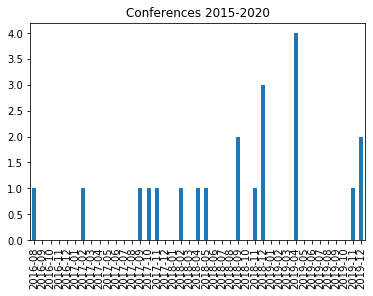

In [6]:
s.plot.bar(title='Conferences 2015-2020')


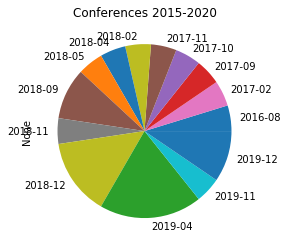

In [7]:
s.plot.pie(title='Conferences 2015-2020')

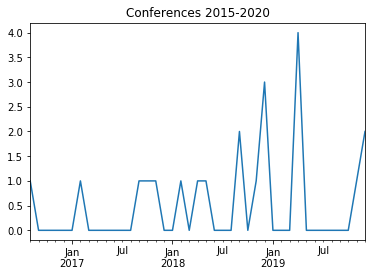

In [8]:
s.plot.line(title='Conferences 2015-2020')